In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import corner

In [4]:
def set_ticklabels(ax, size=18):
    ticklabels_x = ax.get_xticklabels()
    ticklabels_y = ax.get_yticklabels()

    for label_x in ticklabels_x:
        label_x.set_fontsize(size)
        label_x.set_family('serif')
    for label_y in ticklabels_y:
        label_y.set_fontsize(size)
        label_y.set_family('serif')

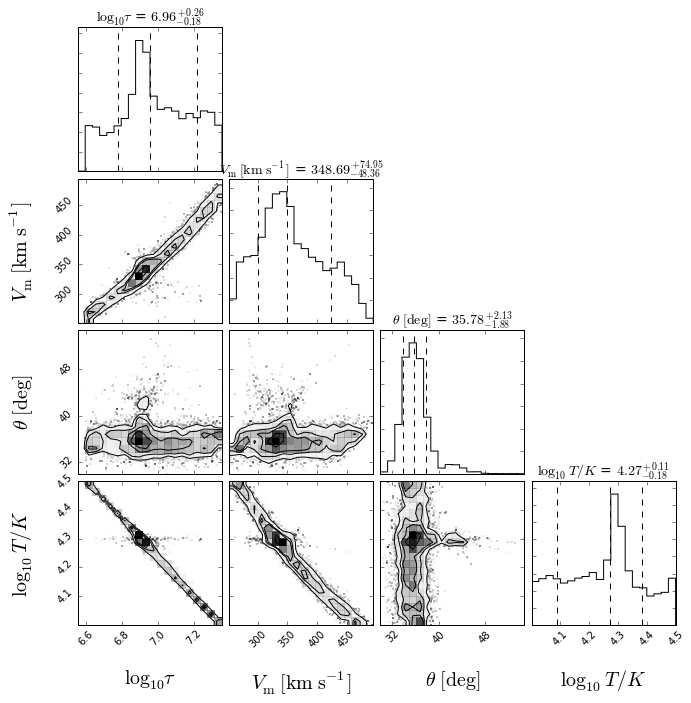

In [6]:
def plot_emcee_results():
    data = np.loadtxt("../data/emcee/sampler_flatchain.dat",delimiter=",")
    fig = corner.corner(data, labels=[r"$\log_{10}\tau$", r"$V_{\rm m}\ [\mathrm{km\ s^{-1}}]$", 
                                      r"$\theta\ \mathrm{[deg]}$", r"$\log_{10}\ T/K$"],
                        quantiles=[0.16, 0.5, 0.84], show_titles=True, 
                        title_kwargs={"fontsize": 14}, label_kwargs={"fontsize":20})
    fig.show()
    fig.savefig("../paper/emcee_results.pdf", bbox_inches='tight')
plot_emcee_results()

In [7]:
def plot_comparison(logT=4.0):
    filename_obs = "../data/obs/t1214-cleanf0_normalized.txt"
    filename_multiphase = "../data/multiphase/spectra/000_791.dat"
    filename_rotation = "../data/rotation/analytic_rotation_best_emcee_params.dat"

    data = np.loadtxt(filename_rotation)
    tol = np.loadtxt(filename_obs)
    multiphase = np.loadtxt(filename_multiphase)
    
    v_th = 12.85*np.sqrt((10.0**logT)/(10.0**4.0))

    vel_theory = -data[:,0]*v_th 
    intensity_theory = data[:,1]
    vel_obs = tol[:,0]
    intensity_obs = tol[:,1]
    intensity_err_obs = tol[:,2]
    vel_multiphase = multiphase[:,0]
    intensity_multiphase = multiphase[:,1]
        
    norm_theory = np.fabs(np.trapz(intensity_theory, vel_theory))
    norm_obs = np.fabs(np.trapz(intensity_obs, vel_obs))
    norm_multiphase = np.fabs(np.trapz(intensity_multiphase, vel_multiphase))
    
    
    
    intensity_theory = intensity_theory/norm_theory
    intensity_obs = intensity_obs/norm_obs
    intensity_err_obs = intensity_err_obs/norm_obs
    intensity_multiphase = intensity_multiphase/norm_multiphase
    
    #fig, ax = pyplot.subplots(figsize=(8, 8))
    fig = plt.figure(1, figsize=(11,10))
    ax = plt.axes()
    set_ticklabels(ax, size=35)
    plt.plot(vel_multiphase/100, intensity_multiphase*1E3, label=r"${\mathrm{Multiphase\ (numerical)}}$", 
             linewidth=6, alpha=0.9, color='red')
    plt.plot(vel_theory/100, intensity_theory*1E3,label=r"${\mathrm{Rotation\ (analytic)}}$",
             linewidth=2,alpha=0.9, color='blue')
    #plt.plot(vel_obs/100, intensity_obs*1E3)
    
    plt.errorbar(vel_obs/100, intensity_obs*1E3, yerr=intensity_err_obs*1E3, 
                label=r"$\mathrm{Tololo\ 1214-277}$", fmt='o', markersize=10, alpha=0.5, elinewidth=2, color='black')
    plt.legend(loc=1, prop={'size':28},scatterpoints=1)
    ax.set_xlim([-12.0, 12.0])
    ax.set_ylim([0.0, 1.6])
    ax.grid(True)

    plt.xlabel(r"$v \mathrm{[100\ km\ s^{-1}]}$", fontsize=40)
    plt.ylabel(r"$\mathrm{Intensity\ [arbitrary\ units]}$", fontsize=40)
    plt.savefig("../figs/CLARA-TOL-main.pdf", bbox_inches='tight')
    plt.show(fig)
    plt.close(fig)
    return 

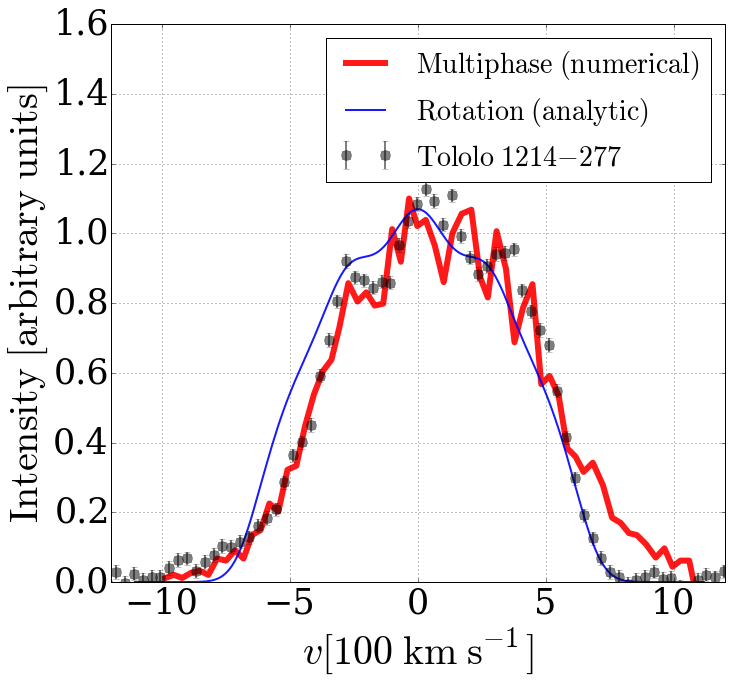

In [10]:
plot_comparison(logT=4.27)

6.17135516293e+21 cm
[ 287.64542189  287.64542189  287.64542189 ...,  335.69958389  335.69958389
  334.95817766] km / s
[ 2.03390772  2.82608295  4.30228028]


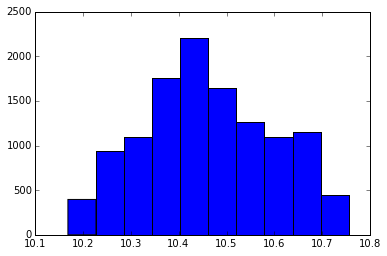

In [23]:
from astropy.constants import G, M_sun, kpc, k_B, m_p
from astropy import units as u

data = np.loadtxt("../data/emcee/sampler_flatchain.dat",delimiter=",")
velocity = data[:,1]
r = 2.0 * kpc.to('cm')
print r
v = velocity * u.kilometer / u.second
print v
dynamical_mass = r * v **2 / (2.0*G.cgs)
m = dynamical_mass.to('M_sun').value
a  =plt.hist(log_dyn_mass_m_sun)
m_percentile = np.percentile(m, q=[14,50,86])
print m_percentile/1E10